In [1]:
import sys
from pathlib import Path

import pandas as pd

sys.path.append(str(Path.cwd().parent))

from models.core.auxiliary import Auxiliary
from models.scenario.scenario import Scenario
from models.scenario.scenario_manager import ScenarioManager
from models.visualization.visualization import Visualization

In [2]:
# Define auxiliary variables
auxiliaries = [
    Auxiliary("rabbit_reproduction_rate", lambda: 0.1),
    Auxiliary("hunting_rate", lambda: 0.02),
    Auxiliary("fox_reproduction_rate", lambda: 0.01),
    Auxiliary("fox_death_rate", lambda: 0.1),
]

# Initial values for the stocks
initial_values = {"rabbits": 100, "foxes": 20}

# Rates and rate functions for the flows
rates = {
    "rabbit_birth": {
        "rate_function": lambda rabbits, rabbit_reproduction_rate: rabbits
        * rabbit_reproduction_rate,
        "source": None,
        "destination": "rabbits",
    },
    "rabbit_death": {
        "rate_function": lambda rabbits, foxes, hunting_rate: rabbits
        * foxes
        * hunting_rate,
        "source": "rabbits",
        "destination": None,
    },
    "fox_birth": {
        "rate_function": lambda rabbits, foxes, fox_reproduction_rate: rabbits
        * foxes
        * fox_reproduction_rate,
        "source": None,
        "destination": "foxes",
    },
    "fox_death": {
        "rate_function": lambda foxes, fox_death_rate: foxes * fox_death_rate,
        "source": "foxes",
        "destination": None,
    },
}

In [3]:
scenario1 = Scenario("Base Scenario", {"rabbits": 100, "foxes": 20}, rates, auxiliaries)
scenario2 = Scenario("High Rabbits", {"rabbits": 200, "foxes": 20}, rates, auxiliaries)


In [4]:
# Add scenarios to the manager
manager = ScenarioManager()
manager.add_scenario(scenario1)
manager.add_scenario(scenario2)

# Run all scenarios
manager.run_all(simulation_time=1000, dt=1)

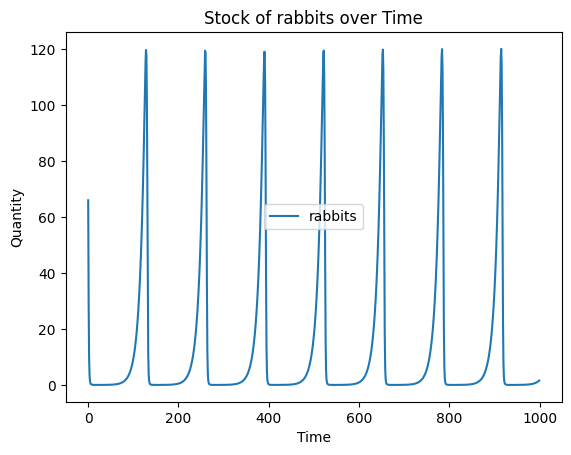

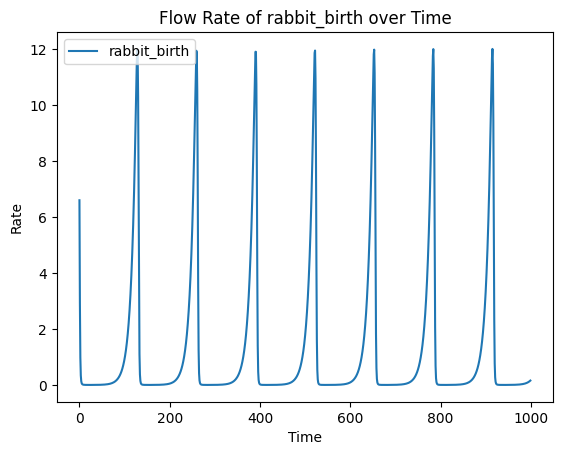

In [5]:
# Get results for a specific scenario
results = manager.get_results("Base Scenario")
viz = Visualization(results)
viz.plot_stock("rabbits",1000)
viz.plot_flow("rabbit_birth",1000)
# viz.animate_simulation(["Rabbits", "Foxes"], 1000)

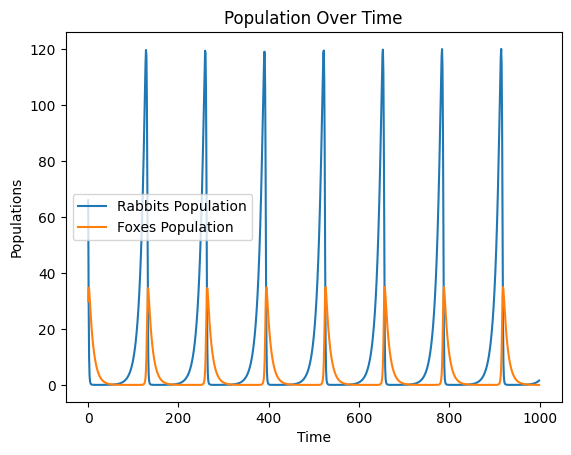

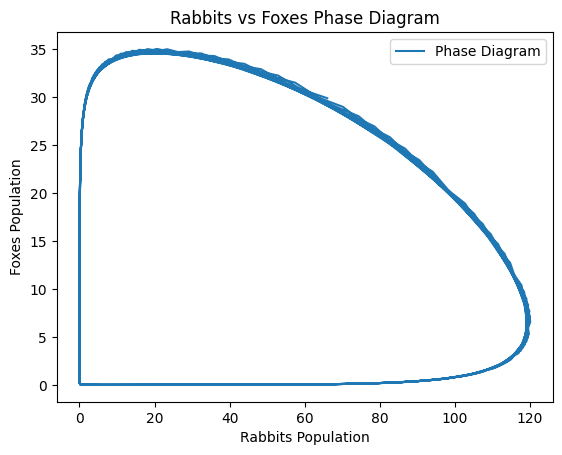

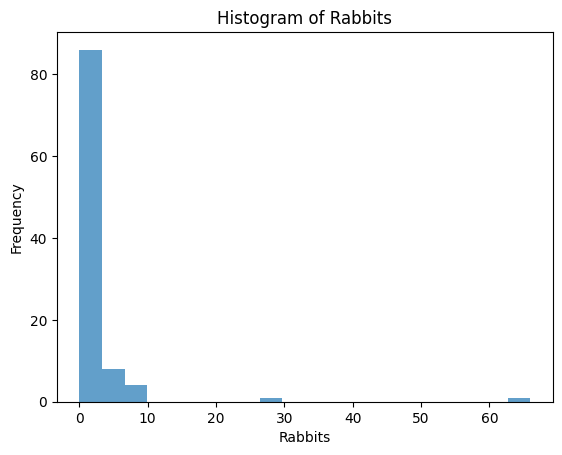

In [6]:
stock_1 = 'rabbits'
stock_2 = 'foxes'
stocks = [stock_1,stock_2]
viz.plot_population_over_time(stocks,1000)
viz.plot_phase_diagram(stock_1,stock_2,1000)
viz.plot_hist(stock_1,100)
# viz.plot_stacked_bar(stock_1,stock_2,1000)

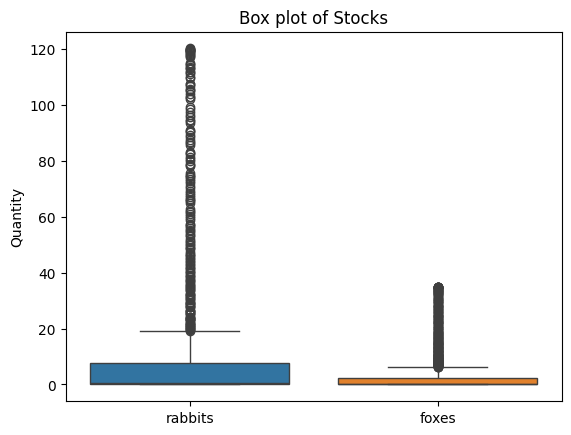

In [7]:
viz.plot_box_plot(stock_1,stock_2,1000)

In [8]:
import matplotlib.pyplot as plt

# Définir la plage de valeurs pour rabbit_reproduction_rate
sensitivity_values = [0.01,0.02,0.03,0.04,0.05,0.1]

# Exécuter l'analyse de sensibilité sur le scénario 'Base Scenario'
sensitivity_results = scenario1.run_sensitivity_analysis_univariate(
    "auxiliaries","rabbit_reproduction_rate", sensitivity_values,300
)

# Afficher ou analyser les résultats
for rate, result in sensitivity_results.items():
    print(f"Rate: {rate}, First 20 Results: {pd.DataFrame(result).head(20)}")
# Supposons que 'sensitivity_results' est un dictionnaire avec des clés étant les valeurs testées
# et les valeurs étant les résultats de la simulation correspondants



Rate: 0.01, First 20 Results:       rabbits      foxes  rabbit_birth  rabbit_death  fox_birth  fox_death  \
0   60.600000  28.908000      0.606000     35.036496  17.518248   2.890800   
1   25.819139  32.734617      0.258191     16.903593   8.451796   3.273462   
2    9.004702  32.114045      0.090047      5.783548   2.891774   3.211404   
3    3.253365  29.842949      0.032534      1.941800   0.970900   2.984295   
4    1.324681  27.214445      0.013247      0.721009   0.360505   2.721445   
5    0.609708  24.642337      0.006097      0.300493   0.150246   2.464234   
6    0.312308  22.247367      0.003123      0.138961   0.069480   2.224737   
7    0.175081  20.057686      0.001751      0.070234   0.035117   2.005769   
8    0.105895  18.071033      0.001059      0.038273   0.019136   1.807103   
9    0.068299  16.275038      0.000683      0.022231   0.011116   1.627504   
10   0.046528  14.654349      0.000465      0.013637   0.006818   1.465435   
11   0.033220  13.193296      0.00

In [9]:
sensitivity_results

{0.01: {'rabbits': [60.6,
   25.819139039999996,
   9.004701927899031,
   3.2533654879999956,
   1.3246807568533538,
   0.6097084373234295,
   0.3123077833678993,
   0.1750807395738806,
   0.10589491435907672,
   0.06829852672367581,
   0.04652797730291838,
   0.033220144835080845,
   0.024699025629103158,
   0.01902038963020667,
   0.015102891328645274,
   0.012317976467751035,
   0.010285780398456627,
   0.00876866412615886,
   0.007613311518433211,
   0.006718039086146531,
   0.006013710134161092,
   0.00545224898972534,
   0.004999536544264216,
   0.00463090470701088,
   0.004328213162156759,
   0.0040779127245337415,
   0.003869737471803764,
   0.0036958057652325977,
   0.003549992162053265,
   0.0034274819136375836,
   0.0033244505123851925,
   0.003237830163618063,
   0.0031651375238423048,
   0.0031043451822189297,
   0.0030537847535459218,
   0.003012073075542227,
   0.0029780554728020808,
   0.0029507617538515234,
   0.0029293717976535336,
   0.002913188426177021,
   0.002901

In [10]:
import itertools
def plot_simulation_results(sensitivity_results, stock_names, flow_names=None):
    # Créez une palette de couleurs
    color_cycle = itertools.cycle(['blue', 'green', 'red', 'purple', 'orange', 'brown'])
    
    # Générez une couleur pour chaque ensemble de paramètres
    colors = {params: next(color_cycle) for params in sensitivity_results.keys()}

    # Préparez la figure et les axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Tracez les données pour chaque ensemble de paramètres
    for params, df in sensitivity_results.items():
        for stock_name in stock_names:
            ax.plot(df['time'], df[stock_name], label=f'{stock_name} at {params}', color=colors[params], marker='o')
        if flow_names:
            for flow_name in flow_names:
                ax.plot(df['time'], df[flow_name], label=f'{flow_name} at {params}', color=colors[params], linestyle='--')

    # Réglages des axes et affichage
    ax.set_xlabel('Time')
    ax.set_ylabel('Quantity')
    ax.set_title('Simulation Results for Different Parameters')
    ax.legend()
    plt.show()

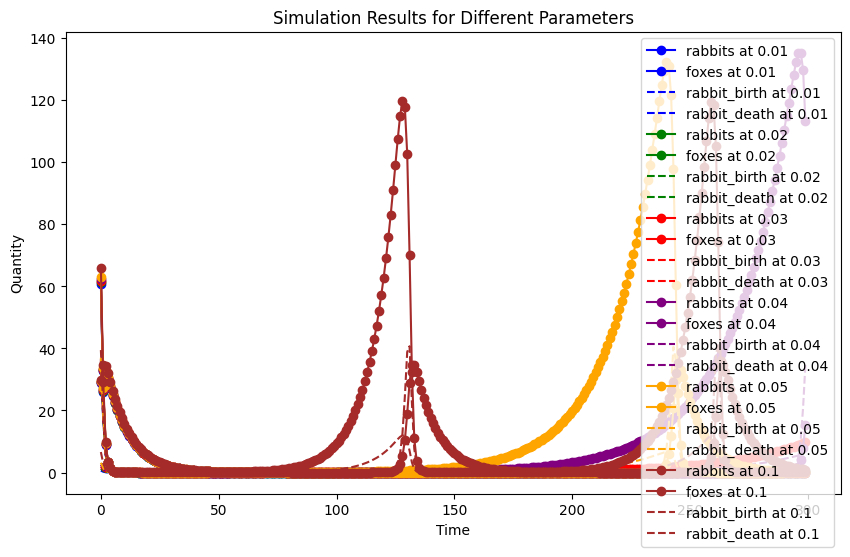

In [11]:
plot_simulation_results(sensitivity_results, stock_names=['rabbits', 'foxes'], flow_names=['rabbit_birth', 'rabbit_death'])

In [12]:
from itertools import product


# Définition des plages de valeurs pour chaque paramètre
rabbit_reproduction_rates = [0.1, 0.15, 0.2]
hunting_rates = [0.01, 0.015, 0.02]

# Génération de toutes les combinaisons possibles de taux de reproduction et de chasse
param_combinations = list(product(rabbit_reproduction_rates, hunting_rates))

# Paramètres et leurs composants à modifier
parameters_to_test = [
    {'component': 'auxiliaries', 'name': 'rabbit_reproduction_rate'},
    {'component': 'auxiliaries', 'name': 'hunting_rate'}
]

# Exécution de l'analyse de sensibilité multivariable
multivariable_results = scenario1.run_sensitivity_analysis_multivariate(parameters_to_test, param_combinations,200)


In [13]:
multivariable_results

{(0.1,
  0.01): {'rabbits': [88.0,
   64.04288,
   35.25112917181716,
   15.194310438351657,
   6.17567637444146,
   2.700336251236923,
   1.3162017451929395,
   0.7126216212787868,
   0.42308204795702653,
   0.27178805802587624,
   0.1867295361595696,
   0.1358724184462209,
   0.10386403693577508,
   0.08284894009640478,
   0.06857200379259024,
   0.05861120122986374,
   0.05152722802001592,
   0.046432223166767345,
   0.04276059606149173,
   0.04014209118560166,
   0.0383288324062247,
   0.03715198444954605,
   0.036495238003472194,
   0.03627815651837268,
   0.036445471918955356,
   0.036960064682616325,
   0.03779828219133411,
   0.03894677549300615,
   0.040400343923191306,
   0.0421604631959113,
   0.04423428708930433,
   0.0466339847525181,
   0.049376321679393986,
   0.052482422391636786,
   0.0559776727756294,
   0.0598917334525247,
   0.06425864479326794,
   0.0691170106527167,
   0.07451025251326862,
   0.08048692910184341,
   0.08710111907497149,
   0.09441286632450292,
   

In [14]:
def calculate_elasticities(sensitivity_results, base_params, comparison_params, stock_name):
    elasticities = {}
    base_df = pd.DataFrame(sensitivity_results[base_params])
    base_population = base_df[stock_name].mean() # Ou une autre mesure centrale selon le contexte

    for params, comparison_dict in sensitivity_results.items():
        if params != base_params:
            comparison_df = pd.DataFrame(comparison_dict)
            comparison_population = comparison_df[stock_name].mean()  # Idem
            percentage_change_in_population = ((comparison_population - base_population) / base_population) * 100
            percentage_change_in_params = ((params[0] - base_params[0]) / base_params[0]) * 100  # Adapté pour un seul paramètre, à généraliser si nécessaire

            if percentage_change_in_params != 0:
                elasticity = percentage_change_in_population / percentage_change_in_params
                elasticities[params] = elasticity

    return elasticities


In [15]:

# Base params correspond à la combinaison de paramètres de référence
base_params = (0.1, 0.01)  # Par exemple, taux de reproduction des lapins et taux de chasse de base

# Comparison params correspond aux autres combinaisons de paramètres pour lesquelles vous avez des résultats
comparison_params = [(0.15, 0.01), (0.2, 0.01)]  # Liste des autres paramètres

# Stock name est le nom de la variable pour laquelle vous calculez l'élasticité
stock_name = 'rabbits'

# Calculer les élasticités
elasticities = calculate_elasticities(multivariable_results, base_params, comparison_params, stock_name)

# Vous pouvez ensuite passer ces élasticités à une fonction de visualisation si désiré


In [16]:
elasticities

{(0.15, 0.01): 0.8018088949818017,
 (0.15, 0.015): 0.8060258849247296,
 (0.15, 0.02): 0.900037892681044,
 (0.2, 0.01): 0.2024254712785618,
 (0.2, 0.015): 0.17237188135084086,
 (0.2, 0.02): 0.17878182424607408}

In [17]:
def plot_elasticities(elasticities, title="Elasticities of Parameters"):
    # Visualiser les élasticités
    params, values = zip(*elasticities.items())
    plt.bar(range(len(params)), values)
    plt.xticks(range(len(params)), params)
    plt.ylabel('Elasticity')
    plt.title(title)
    plt.show()

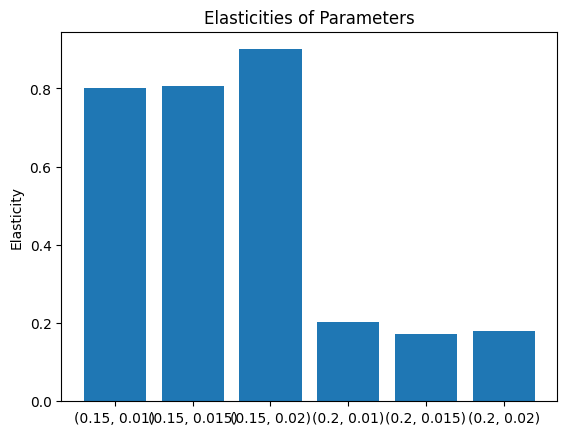

In [18]:
plot_elasticities(elasticities)

In [19]:
pd.DataFrame(results[0])

KeyError: 0

In [ ]:
pd.DataFrame(results[1])

,rabbits,foxes,rabbit_birth,rabbit_death,fox_birth,fox_death,rabbit_reproduction_rate,hunting_rate,fox_reproduction_rate,fox_death_rate,time
0,66.000000,29.880000,6.600000,39.441600,19.720800,2.988000,0.1,0.02,0.01,0.1,0
1,29.214240,34.748293,2.921424,20.302900,10.151450,3.474829,0.1,0.02,0.01,0.1,1
2,9.802474,34.339037,0.980247,6.732151,3.366075,3.433904,0.1,0.02,0.01,0.1,2
3,3.377356,31.948910,0.337736,2.158057,1.079028,3.194891,0.1,0.02,0.01,0.1,3
4,1.341229,29.139676,0.134123,0.781660,0.390830,2.913968,0.1,0.02,0.01,0.1,4
...,...,...,...,...,...,...,...,...,...,...,...
95,5.819031,0.003823,0.581903,0.000445,0.000222,0.000382,0.1,0.02,0.01,0.1,95
96,6.400445,0.003661,0.640045,0.000469,0.000234,0.000366,0.1,0.02,0.01,0.1,96
97,7.039974,0.003526,0.703997,0.000497,0.000248,0.000353,0.1,0.02,0.01,0.1,97
98,7.743425,0.003420,0.774343,0.000530,0.000265,0.000342,0.1,0.02,0.01,0.1,98
